# <font style="color:rgb(50,120,229)">Tracking Multiple Objects</font>

# <font style="color:rgb(50,120,229)">Multi-object Tracking</font>

Till now we have discussed how to track single objects in a sequence of frames. There may be applications where the need is to track multiple objects at the same time. OpenCV has a Multiobject Tracker class which has a very basic implementation of a multi object tracker. It processes the tracked objects independently without any optimization across the tracked objects.

Let’s take a look at code to find out how can we use OpenCV’s multi-object tracking API.

## <font style="color:rgb(50,120,229)">Code - MultiTracker</font>

In [1]:
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
trackerTypes = ['BOOSTING', 'MIL', 'KCF','TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']

<font style="color:rgb(200,0,0)">**NOTE :**</font> GOTURN being a CNN based tracker, uses a caffe model for tracking. The Caffe model and the prototxt file must be present in the directory in which the code is present. You can download the files from [this link](https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=0).

In [4]:
def createTrackerByName(trackerType):
  # Create a tracker based on tracker name
  if trackerType == trackerTypes[0]:
    tracker = cv2.TrackerBoosting_create()
  elif trackerType == trackerTypes[1]:
    tracker = cv2.TrackerMIL_create()
  elif trackerType == trackerTypes[2]:
    tracker = cv2.TrackerKCF_create()
  elif trackerType == trackerTypes[3]:
    tracker = cv2.TrackerTLD_create()
  elif trackerType == trackerTypes[4]:
    tracker = cv2.TrackerMedianFlow_create()
  elif trackerType == trackerTypes[5]:
    tracker = cv2.TrackerGOTURN_create()
  elif trackerType == trackerTypes[6]:
    tracker = cv2.TrackerMOSSE_create()
  elif trackerType == trackerTypes[7]:
    tracker = cv2.TrackerCSRT_create()
  else:
    tracker = None
    print('Incorrect tracker name')
    print('Available trackers are:')
    for t in trackerTypes:
      print(t)

  return tracker

Set tracking algorithm and path to video file



In [5]:
print("Default tracking algoritm is CSRT \n"
    "Available tracking algorithms are:\n")
for t in trackerTypes:
    print(t)

trackerType = "CSRT"

# Set video to load
videoPath = DATA_PATH + "videos/cycle.mp4"

Default tracking algoritm is CSRT 
Available tracking algorithms are:

BOOSTING
MIL
KCF
TLD
MEDIANFLOW
GOTURN
MOSSE
CSRT


Open video file and read first frame

In [6]:
# Create a video capture object to read videos
cap = cv2.VideoCapture(videoPath)

# Read first frame
success, frame = cap.read()

# quit if unable to read the video file
if not success:
    print('Failed to read video')

Draw box around an object. You can redraw the box if the previous selection was not correct. Value of bounding box will only be stored in code when you press ENTER. After pressing ENTER, press any key other than q to select next bounding box. You can keep selecting as many bounding boxes you want. To exit the object selection step, press ESCAPE. Behaviour of selectROI in Python API is different than C++ API. You can only select 1 box while calling selectROI, so we call selectROI multiple times to select multiple objects.

**Remember the sequence : Select box -> Press Enter -> Press another key -> Select Box -> Press Enter -> Press ESC**

In [7]:
## Select boxes
colors = []
for i in range(3):
    # Select some random colors
    colors.append((randint(64, 255), randint(64, 255),
                randint(64, 255)))
# Select the bounding boxes
bboxes = [(471, 250, 66, 159), (349, 232, 69, 102)]
print('Selected bounding boxes {}'.format(bboxes))

Selected bounding boxes [(471, 250, 66, 159), (349, 232, 69, 102)]


In [8]:
## Initialize MultiTracker
# There are two ways you can initialize multitracker
# 1. tracker = cv2.MultiTracker("CSRT")
# All the trackers added to this multitracker
# will use CSRT algorithm as default
# 2. tracker = cv2.MultiTracker()
# No default algorithm specified

# Initialize MultiTracker with tracking algo
# Specify tracker type

# Create MultiTracker object
multiTracker = cv2.MultiTracker_create()

# Initialize MultiTracker
for bbox in bboxes:
    multiTracker.add(createTrackerByName(trackerType), frame, bbox)

Now process frames of video and quit after last frame is read. And then, update tracker with new frame and draw the bounding boxes returned by tracker.

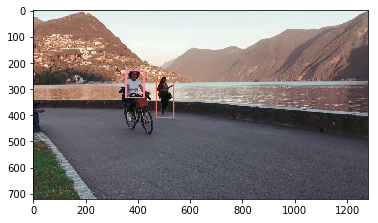

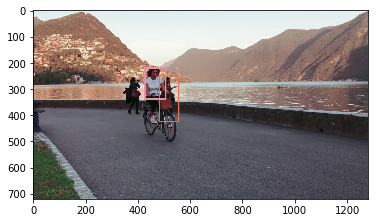

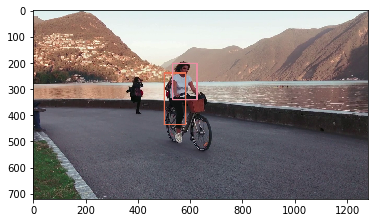

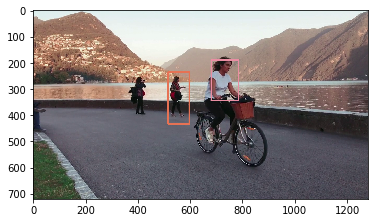

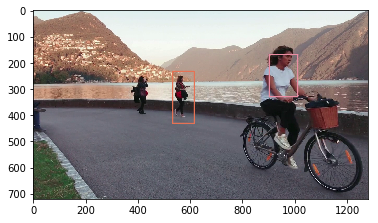

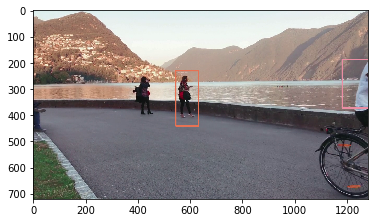

In [9]:
# We will display only 5 frames
count = 0

# Process video and track objects
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # get updated location of objects in subsequent frames
    success, boxes = multiTracker.update(frame)

    # draw tracked objects
    for i, newbox in enumerate(boxes):
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, colors[i], 4, cv2.LINE_AA)

    # show frame
    if count % 10 == 0:
        plt.imshow(frame[:,:,::-1])
        plt.show()
    
    count += 1
    
    if count > 50:
        break

In [10]:
cap.release()